In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

splits = {'train': 'train_df.csv', 'validation': 'val_df.csv', 'test': 'test_df.csv'}
df = pd.read_csv("hf://datasets/Sp1786/multiclass-sentiment-analysis-dataset/" + splits["train"])

/home/adam/Documents/github/BERT_finetuned/BERT-fine-tuned/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df.describe()

,id,label
count,31232.000000,31232.000000
mean,10576.775359,1.043961
std,8010.753795,0.790636
min,0.000000,0.000000
25%,3476.000000,0.000000
50%,8662.000000,1.000000
75%,17071.500000,2.000000
max,27480.000000,2.000000


In [3]:
df.sample(6)

,id,text,label,sentiment
29650,1528,and Im just going into work... if we were mar...,0,negative
15581,7361,i have the adam lambert version of FEELIN GOOD...,1,neutral
24020,2654,It would be a very helpful app if it actually ...,0,negative
4658,9504,Waking up with Star Wars End Title Song in my ...,1,neutral
7194,22681,time to get to work. i`m already starting the ...,0,negative
15267,101,skype call with billie but my webcam dont work,1,neutral


In [4]:
df.value_counts("label")

label
1    11649
2    10478
0     9105
Name: count, dtype: int64

In [5]:
df.value_counts("sentiment")

sentiment
neutral     11649
positive    10478
negative     9105
Name: count, dtype: int64

In [6]:
df.isnull().sum()

id           0
text         0
label        0
sentiment    0
dtype: int64

In [7]:
df.nunique()

id           22801
text         31232
label            3
sentiment        3
dtype: int64

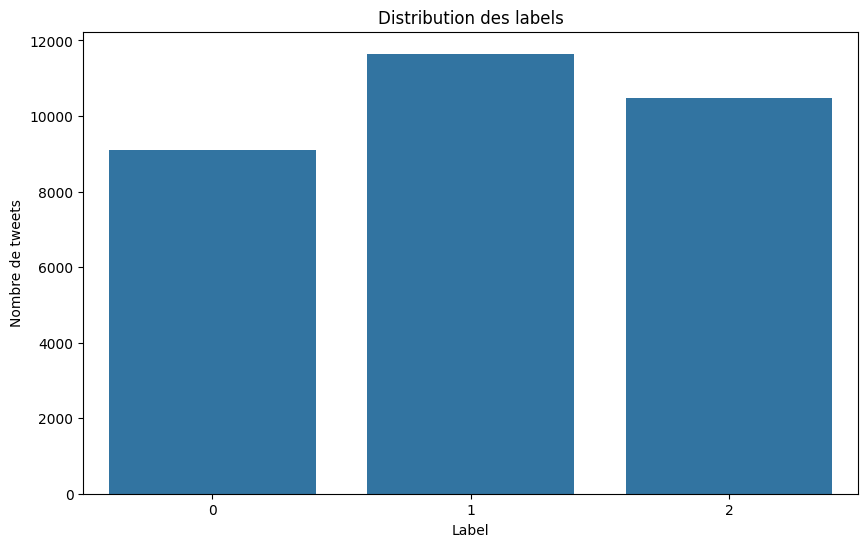

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df)
plt.title('Distribution des labels')
plt.xlabel('Label')
plt.ylabel('Nombre de tweets')
plt.show()

In [9]:
df['text_length'] = df['text'].apply(len)

print("\n Text length statistics:")
print(df['text_length'].describe())


 Text length statistics:
count    31232.000000
mean        95.981013
std         95.064104
min          1.000000
25%         41.000000
50%         72.000000
75%        115.000000
max       2176.000000
Name: text_length, dtype: float64


In [10]:
min_length = df['text_length'].min()
max_length = df['text_length'].max()
print(f"\nMinimum length : {min_length}")
print(f"Maximum length: {max_length}")


Minimum length : 1
Maximum length: 2176


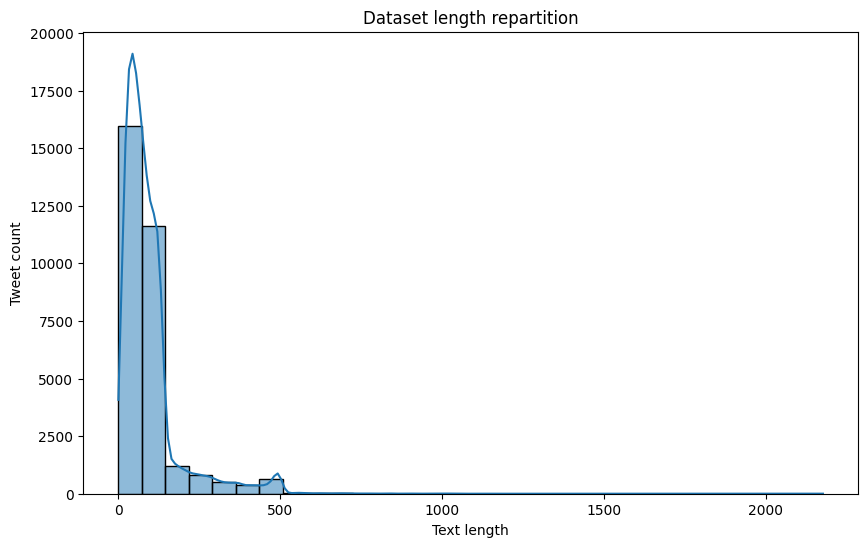

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Dataset length repartition')
plt.xlabel('Text length')
plt.ylabel('Tweet count')
plt.show()

In [18]:
df = df[["text", "label"]]
df.sample(5)

,text,label
841,Am busy yes...But then always am. Hope you ha...,2
31044,This is to all the people who have MySpaces: P...,1
2061,Im not bannished... but I am at work till 6,0
941,Subscription required just to set a reminder.,0
1632,"juss boredd, !",0


In [20]:
df.to_csv("/home/adam/Documents/github/BERT_finetuned/BERT-fine-tuned/dataset.csv")